# Source loading

### PDF loader, splitting, and cleaning

In [5]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from pprint import pprint
from PyPDF2 import PdfReader
import re
import os

directory = 'ignore/documents/'
directory_files = [ file for file in os.listdir(directory) if file.endswith('.pdf')]
for index, file in enumerate(directory_files):
    print((index, file))

(0, 'An Introduction to Statistical Learning with Applications in R.pdf')
(1, 'ISYE 6501 Lecture Transcripts (2).pdf')
(2, 'Practical_Statistics_for_Data_Science__1663052800.pdf')
(3, 'Subscription model.pdf')
(4, 'SystemsDesign_bytebytego.pdf')
(5, 'The-Intelligent-Investor-The-Definitive-Book-on-Value-Investing.pdf')


In [8]:
# Input key variables for loading, splitting and cleaning
chosen_index = 1
document_name = directory_files[chosen_index].split('.')[0]
filepath = directory+directory_files[chosen_index]
use_splitter = True
chunk_size=1000
chunk_overlap=50
remove_pages = False
front_pages_to_remove = 2
last_pages_to_remove = 24
remove_leftover_delimiters = True
delimiters_to_remove = ['\t', '\n', '   ', '  ']


In [ ]:
print(f'Document to extract: {document_name}')

#Load the document by calling loader.load()

loader = PyPDFLoader(filepath)
print(f'Original pages of document: {len(loader)}')
if use_splitter:
    pages = loader.load_and_split(RecursiveCharacterTextSplitter(chunk_size=chunk_size,
                                                        chunk_overlap=chunk_overlap,
                                                        separators = ['\n\n', ' ']))
else:
    pages = loader.load()
print(f'Number of chunks extracted: {len(pages)}')

# Remove pages
if remove_pages:
    for page_number in range(front_pages_to_remove):
        del pages[0]
    for page_number in range(last_pages_to_remove):
        pages.pop()
    print(f'Number of pages after cleaning: {len(pages)}')

# Remove all left over the delimiters and extra spaces
if remove_leftover_delimiters:
    for page in pages:
        for delimiter in delimiters_to_remove:
            page.page_content = re.sub(delimiter, ' ', page.page_content)


print(f'Metadata: {pages[0].metadata}')
print()
print('Printing first 500 characters for pages')
for page_number, page in enumerate(pages[:1]):
    print(f'--------------Page {page_number}, {len(page.page_content)} chars ---------------')
    pprint(pages[0].page_content)

In [54]:
print('First 5 chunks')
pprint(pages[:5])

print('Last 5 chunks')
pprint(pages[-5:])

First 5 chunks
[Document(page_content='Portfolio/Penguin An imprint of Penguin Random House LLC 375 Hudson Street New York, New York 10014 SUBSCRIBED, SUBSCRIPTION ECONOMY, and SUBSCRIPTION ECONOMY INDEX are trademarks owned by Zuora, Inc. Copyright © 2018 by Tien Tzuo Penguin supports copyright. Copyright fuels creativity, encourages diverse voices, promotes free speech, and creates a vibrant culture. Thank you for buying an authorized edition of this book and for complying with copyright laws by not reproducing, scanning, or distributing any part of it in any form without permission. You are supporting writers and allowing Penguin to continue to publish books for every reader. ISBN 9780525536468 (hardcover) ISBN 9780525536475 (ebook) While the author has made every effort to provide accurate telephone numbers, Internet addresses, and other contact information at the time of publication, neither the publisher nor the author assumes any responsibility for errors, or for changes that oc

In [90]:
# Save to txt
with open(directory+document_name+'_raw.txt', mode="w", encoding="utf-8") as f:
    for page in pages:
        f.write(page.page_content)

### Docx file

In [13]:
from langchain.document_loaders import Docx2txtLoader, UnstructuredWordDocumentLoader

loader = Docx2txtLoader("ignore\documents\Q19-1.docx")
# Or we can use unstructured loader to retain the elements such as title etc
# loader = UnstructuredWordDocumentLoader("example_data/fake.docx", mode="elements")
pages = loader.load_and_split(RecursiveCharacterTextSplitter(chunk_size=chunk_size,
                                                        chunk_overlap=chunk_overlap,
                                                        separators = ['\n\n', ' ']))
pages

[Document(page_content='Question 19.1\n\n\n\nDescribe analytics models and data that could be used to make good recommendations to the retailer.  How much shelf space should the company have, to maximize their sales or their profit? Of course, there are some restrictions – for each product type, the retailer imposed a minimum amount of shelf space required, and a maximum amount that can be devoted;  and of course, the physical size of each store means there’s a total amount of shelf space that has to be used.  But the key is the division of that shelf space among the product types.\n\n\n\nFor the purposes of this case, I want you to ignore other factors – for example, don’t worry about promotions for certain products, and don’t consider the fact that some companies pay stores to get more shelf space. Just think about the basic question asked by the retailer, and how you could use analytics to address it.', metadata={'source': 'ignore\\documents\\Q19-1.docx'}),
 Document(page_content='A

### Website link

In [20]:
# from langchain.document_loaders import WebBaseLoader

# loader = WebBaseLoader("https://ai.meta.com/blog/retrieval-augmented-generation-streamlining-the-creation-of-intelligent-natural-language-processing-models/")
# loader.load()

import requests
from bs4 import BeautifulSoup

html_doc = requests.get("https://ai.meta.com/blog/retrieval-augmented-generation-streamlining-the-creation-of-intelligent-natural-language-processing-models/")
soup = BeautifulSoup(html_doc.text, 'html.parser')

### Video loader and parser

In [ ]:
# from langchain.document_loaders.generic import GenericLoader
# from langchain.document_loaders.parsers.audio import OpenAIWhisperParser
# from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

# url="https://www.youtube.com/watch?v=-MOhB2ZoEHw&ab_channel=BrianFeroldi"
# save_dir="ignore/videos/youtube/"
# loader = GenericLoader(
#     YoutubeAudioLoader([url],save_dir),
#     OpenAIWhisperParser()
# )
# docs = loader.load()

## Document Splitting

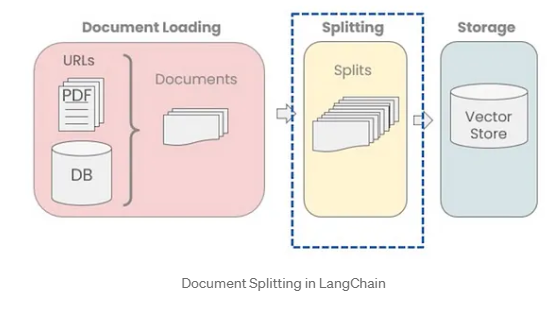

Documents can be very long hence we need to split up not just the documents but the sentences and chunks to keep their meaning. 

The below aims to split the chunks into semantically relevant chunks.

While splitting, we can use overlapping to maintain notion of consistency.

### Example

In [35]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

# with open(directory+document_name+'withoutsplit.txt', mode="r", encoding="utf-8") as f:
#     text = f.read()

text = """When writing documents, writers will use document structure to group content. \
This can convey to the reader, which idea's are related. For example, closely related ideas \
are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. \n\n  \
Paragraphs are often delimited with a carriage return or two carriage returns. \
Carriage returns are the "backslash n" you see embedded in this string. \
Sentences have a period at the end, but also, have a space.\
and words are separated by space."""

print(f'Length of text given {len(text)}')

chunk_size = 100 # length of each chunk
chunk_overlap = 0 # 

r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    separators = ["\n\n", '\n', ' ', '']
)

print('Recursive splitter')
display(r_splitter.split_text(text))

c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    separator = ' '
)
print('\nCharacter splitter')
display(c_splitter.split_text(text))


Length of text given 496
Recursive splitter


['When writing documents, writers will use document structure to group content. This can convey to the',
 "reader, which idea's are related. For example, closely related ideas are in sentances. Similar",
 'ideas are in paragraphs. Paragraphs form a document.',
 'Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns',
 'are the "backslash n" you see embedded in this string. Sentences have a period at the end, but',
 'also, have a space.and words are separated by space.']


Character splitter


['When writing documents, writers will use document structure to group content. This can convey to the',
 "reader, which idea's are related. For example, closely related ideas are in sentances. Similar ideas",
 'are in paragraphs. Paragraphs form a document. \n\n Paragraphs are often delimited with a carriage',
 'return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this',
 'string. Sentences have a period at the end, but also, have a space.and words are separated by space.']

# Vector Store and embedding

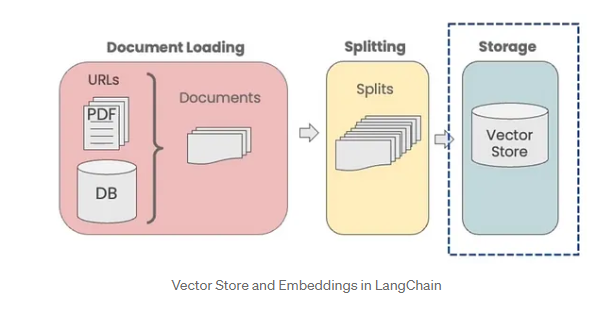

### Example using text file
Splitting from a consolidated text like this will lose the metadata for page

In [8]:
from langchain.document_loaders import TextLoader, PyPDFLoader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma


# create the open-source embedding function
embedding_function = OpenAIEmbeddings(deployment="SL-document_embedder",
                                      model='text-embedding-ada-002',
                                      show_progress_bar=True) 

# load the document and split it into chunks
loader = TextLoader('ignore/documents/Subscription modelparsed.txt', encoding="utf-8")
docs = loader.load()

# splitting
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=20,
    separators = ['\n\n', ' ']
)

# documents is just a list of LangChain Document class objects
documents = r_splitter.split_documents(docs)
print(f'Total length of documents after split : {len(documents)}')

print(documents[0].page_content)
print(documents[0].metadata)

# load it into Chroma
print('Initializing vector_db')
persist_directory = 'ignore/chroma/'
vector_db = Chroma.from_documents(documents = documents, 
                                embedding = embedding_function,
                                persist_directory = persist_directory)
print('Complete')


Total length of documents after split : 377
INTRODUCTION A couple of years ago I wrote an article for Fortune  advising people not to go to business school. I argued that it was a waste of time, that for the past hundred years, business schools basically taught one idea: The fundamental goal of every business is to create a hit product, and then sell as many units of that product as possible, thereby diluting fixed costs in order to compete on margins. I said that this model was over, that the situation has changed. Instead, I argued, the goal of business should be to start with the wants and needs of a particular customer base, then create a service that delivers ongoing value to those customers. The idea was to turn customers into subscribers in order to develop recurring revenue. I called the context for this change the Subscription Economy. Oh man, did I get a lot of crap for that article. There were comments like: Do you really think we don’t get it, Tien? That we don’t understand

### Save as json intermediate file

In [ ]:
from  langchain.schema import Document
import json
from typing import Iterable


def save_docs_to_jsonl(array:Iterable[Document], file_path:str)->None:
    with open(file_path, 'w') as jsonl_file:
        for doc in array:
            jsonl_file.write(doc.json() + '\n')

def load_docs_from_jsonl(file_path)->Iterable[Document]:
    array = []
    with open(file_path, 'r') as jsonl_file:
        for line in jsonl_file:
            data = json.loads(line)
            obj = Document(**data)
            array.append(obj)
    return array

loader = PyPDFLoader(file_path='file.pdf')
docs = loader.load()
print(len(docs))

save_docs_to_jsonl(docs,'data.jsonl')
docs2=load_docs_from_jsonl(,'data.jsonl')
print(len(docs2))

## Customized function to load into vector db

In [10]:
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.schema import Document
from PyPDF2 import PdfReader

def load_split_clean(file_input : list, use_splitter = True, 
                     remove_leftover_delimiters = True,
                     remove_pages = False,
                     chunk_size=1000, chunk_overlap=50,
                     front_pages_to_remove : int = None, last_pages_to_remove : int = None, 
                     delimiters_to_remove : list = ['\t', '\n', '   ', '  ']):
    
    # Main list of all LangChain Documents
    documents = []

    # Handle file by file
    for file_index, file in enumerate(file_input):
        reader = PdfReader(file)
        print(f'Original pages of document: {len(reader.pages)}')
        print(reader.metadata)
        pdf_title = 'uploaded_file_' + str(file_index)
        for key, value in reader.metadata.items():
            if 'title' in key.lower():
                pdf_title = value
                                
        # Remove pages
        if remove_pages:
            for _ in range(front_pages_to_remove):
                del reader.pages[0]
            for _ in range(last_pages_to_remove):
                reader.pages.pop()
            print(f'Number of pages after skipping: {len(reader.pages)}')

        # Each file will be split into LangChain Documents and kept in a list
        document = []

        # Loop through each page and extract the text and write in metadata
        if use_splitter:
            splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size,
                                                chunk_overlap=chunk_overlap,
                                                separators = ['\n\n', ' '])
            for page_number, page in enumerate(reader.pages):
                page_chunks = splitter.split_text(page.extract_text()) # splits into a list of strings (chunks)

                # Write into Document format with metadata
                for chunk in page_chunks:
                    document.append(Document(page_content=chunk, 
                                             metadata={'source': pdf_title , 'page':str(page_number+1)}))
            
        else:
            # This will split purely by page
            for page_number, page in enumerate(reader.pages):
                document.append(Document(page_content=page.extract_text(), 
                                      metadata={'source': pdf_title , 'page':str(page_number+1)}))
                i += 1
        

        # Remove all left over the delimiters and extra spaces
        if remove_leftover_delimiters:
            for chunk in document:
                for delimiter in delimiters_to_remove:
                    chunk.page_content = re.sub(delimiter, ' ', chunk.page_content)

        documents.extend(document)

    print(f'Number of document chunks extracted: {len(documents)}')
    return documents


def embed_to_vector_db(documents : list, persist_directory : str = None ):
    # create the open-source embedding function
    embedding_function = OpenAIEmbeddings(deployment="SL-document_embedder",
                                        model='text-embedding-ada-002',
                                        show_progress_bar=True) 

    # load it into Chroma
    print('Initializing vector_db')
    if persist_directory:
        vector_db = Chroma.from_documents(documents = documents, 
                                        embedding = embedding_function,
                                        persist_directory = persist_directory)    
    else:
        vector_db = Chroma.from_documents(documents = documents, 
                                        embedding = embedding_function)
    print('Complete')

# Trial
directory = 'ignore/documents/'
directory_files = [ file for file in os.listdir(directory) if file.endswith('.pdf')]
for index, file in enumerate(directory_files):
    print((index, file))
chosen_index = 3
filepath = directory+directory_files[chosen_index]
uploaded_files = [open(filepath, "rb")]
documents = load_split_clean(uploaded_files)
#embed_to_vector_db(documents)

(0, 'An Introduction to Statistical Learning with Applications in R.pdf')
(1, 'ISYE 6501 Lecture Transcripts (2).pdf')
(2, 'Practical_Statistics_for_Data_Science__1663052800.pdf')
(3, 'Subscription model.pdf')
(4, 'SystemsDesign_bytebytego.pdf')
(5, 'The-Intelligent-Investor-The-Definitive-Book-on-Value-Investing.pdf')
Original pages of document: 159
{'/Author': 'Tien Tzuo & Gabe Weisert', '/CreationDate': "D:20190826144832+00'00'", '/Creator': 'calibre 2.75.1 [https://calibre-ebook.com]', '/Producer': 'calibre 2.75.1 [https://calibre-ebook.com]', '/Title': 'Subscribed: Why the Subscription Model Will Be Your Companys Future - and What to Do About It'}
Number of document chunks extracted: 157


In [11]:
pprint(documents[:5])
print()
documents[-5:]

[Document(page_content='Portfolio/Penguin An imprint of Penguin Random House LLC 375 Hudson Street New York, New York 10014 SUBSCRIBED, SUBSCRIPTION ECONOMY, and SUBSCRIPTION ECONOMY INDEX are trademarks owned by Zuora, Inc. Copyright © 2018 by Tien Tzuo Penguin supports copyright. Copyright fuels creativity, encourages diverse voices, promotes free speech, and creates a vibrant culture. Thank you for buying an authorized edition of this book and for complying with copyright laws by not reproducing, scanning, or distributing any part of it in any form without permission. You are supporting writers and allowing Penguin to continue to publish books for every reader. ISBN 9780525536468 (hardcover) ISBN 9780525536475 (ebook) While the author has made every effort to provide accurate telephone numbers, Internet addresses, and other contact information at the time of publication, neither the publisher nor the author assumes any responsibility for errors, or for changes that occur after publi

[Document(page_content='Thompson, Ben, 66 , 94 , 184 Thompson, Mark, 78 Three Rooms mental model of storytelling and, 149 –51 Thync, 107 Times Warner, 46 total quality initiative, 16 Tower Records, 17 Trunk Club, 23 , 28 , 33 Trupanion, 118 Tunguz, Tomasz, 82 Twitch, 42 Uber, 3 , 13 –14, 53 , 54 –55 Udemy, 117 Ulrich, Lars, 39 UNTUCKit, 23 upselling, 164 –67 usage-based billing, 221 –27 user data, 139 –40 utilities, 119 value metric, 221 value of customers, increasing, 164 –67 VandeHei, Jim, 68 Vanity Fair, 65 Veghte, Bill, 171 Venmo, 121 Vice, 67 Virgin Megastore, 17 virtuous feedback loop, 48 –49, 136 –37 Volvo, 52 Vox, 71 VRBO, 120 Wadhwani, David, 81 , 88 Walgreens, 34 Wall Street Journal, The, 65 Walmart, 25 –26 Warby Parker, 23 , 33 , 145 Wealthfront, 121 West, Kanye, 48 , 136 –37 Westfield World Trade Center mall, 35 WeWork, 120 Whim app, 63 Whirlpool, 107 Whole Foods, 23 Wizard of Oz, The (film), 37 Wolf, Michael J., 24 , 76 , 78 Wood, J. B., 85 –86, 96 Wufoo, 171 Xero, 3 Xerox

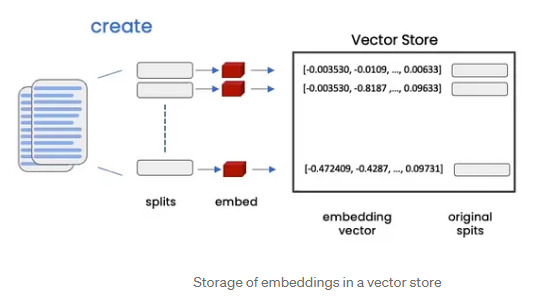

In [145]:
from pprint import pprint

# query it
query = "What is the meaning of a Subscription economy? Give an example"
docs = vector_db.similarity_search(query)
print(f'Number of matches: {len(docs)}')
print('Top query')
pprint(docs[0].page_content)

Number of matches: 4
Top query
('the goal of business should be to start with the wants and needs of a '
 'particular customer base, then create a service that delivers ongoing value '
 'to those customers. The idea was to turn customers into subscribers in order '
 'to develop recurring revenue. I called the context for this change the '
 'Subscription Economy. Oh man, did I get a lot of crap for that article. '
 'There were comments like: Do you really think we don’t get it, Tien? That we '
 'don’t understand the difference between a product and a')


In [134]:
vector_db.delete_collection()